## WE RATE DOGS: TWITTER RATING ANALYSIS

## Table of Contents


<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#gatheringdata">Gathering data</a></li>
<li><a href="#assessingdata">Assessing data</a></li>
<li><a href="#cleaningdata">Cleaning Data</a></li>
<blockquote>
<li><a href="#quality">Quality</a></li>
<li><a href="#tidiness">Tidiness</a></li>
</blockquote>
<li><a href="#storinganalyzingandvisualizing">Storing, Analyzing, and Visualizing</a></li>
<blockquote>
<li><a href="#one">Distribution of ratings</a></li>
<li><a href="#two">Relationship between different variables</a></li>
<li><a href="#three">Retweet count Vs. Favorite count</a></li>
<li><a href="#four">Retweet and Favorite count by hour of the day</a></li>
<li><a href="#five">Retweet and Favorite count by day of the week</a></li> 
<li><a href="#six">Top 10 favorite breeds of dog</a></li> 
</blockquote>
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id="introduction"></a>
## Introduction

The following dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. **WeRateDogs** is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators are almost always greater than 10 like 11/10, 12/10, 13/10, etc. The reason why the numerators are greater than denominator is that "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively to use it as a part of analysis for their student project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

<a id='gatheringdata'></a>
## Gathering Data
- **Twitter archive file**: Provided by udacity. There are 17 columns and 2356 rows in the data set.
  
  Original columns of dataframe are as follows:
  
    1. tweet_id: the unique identifier for each tweet
    2. in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
    3. in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
    4. timestamp: time when this Tweet was created
    5. source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
    6. text: actual UTF-8 text of the status update
    7. retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
    8. retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
    9. retweeted_status_timestamp: time of retweet
    10. expanded_urls: tweet URL
    11. rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
    12. rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
    13. name: name of the dog
    14. doggo: one of the 4 dog "stage"
    15. floofer: one of the 4 dog "stage"
    16. pupper: one of the 4 dog "stage"
    17. puppo: one of the 4 dog "stage
    
    
 - **Twitter download**:  I had issues with getting access. Hence, used the JSON file provided by Udacity
 
     Columns of the dataframe are as follows:
     
     1. tweet_id: the unique identifier for each tweet
    2. retweet_count: counts of retweets
    3. favorite_count: counts of likes by people
 
- **Image Prediction file**: This file is downloaded from the servers of udacity. It has 2075 rows and 12 columns.
  
    Columns of the dataframe are as follows:
    
    1. tweet_id: the unique identifier for each tweet
    2. jpg_url: url of each tweet
    3. img_num: No. of images
    4. p1: the algorithm's first prediction for the image in the tweet
    5. p1_conf: how confident the algorithm is in its first prediction
    6. p1_dog: whether or not the first prediction is a breed of dog 
    7. p2: the algorithm's second most likely prediction
    8. p2_conf: how confident the algorithm is in its second prediction
    9. p2_dog: whether or not the seconf prediction is a breed of dog
    10. p3: the algorithm's third prediction for the image in the tweet
    11. p3_conf: how confident the algorithm is in its third prediction
    12. p3_dog: whether or not the thir prediction is a breed of dog

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import tweepy 
import json
import re

In [2]:
# Reading csv
archivedf = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction= pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [5]:
# Reading JSON file
tweetjson = 'tweet-json.txt'

tweetjson_df = []

with open(tweetjson, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweetjson_df.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
tweet_df = pd.DataFrame(tweetjson_df, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])


In [6]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id = 'assessingdata'></a>
## Assessing data

**Archive df**

In [8]:
# Checking data
archivedf.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [9]:
archivedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archivedf.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
archivedf.rating_numerator.value_counts().sort_index().head(4)

0     2
1     9
2     9
3    19
Name: rating_numerator, dtype: int64

In [12]:
archivedf.rating_numerator.value_counts().sort_index().tail(4)

420     2
666     1
960     1
1776    1
Name: rating_numerator, dtype: int64

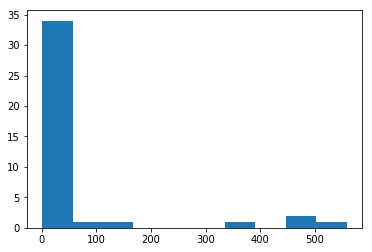

In [13]:
archivedf.rating_numerator.value_counts().hist(grid = False)

In [14]:
archivedf.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
archivedf[archivedf.retweeted_status_id.notnull()].shape[0] + archivedf[archivedf.in_reply_to_status_id.notnull()].shape[0] - archivedf[archivedf.in_reply_to_status_id.notnull() & archivedf.retweeted_status_id.notnull()].shape[0]

259

In [16]:
sum(archivedf['tweet_id'].duplicated())

0

In [17]:
archivedf.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
archivedf.floofer.value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [19]:
archivedf.pupper.value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [20]:
archivedf.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [21]:
archivedf[archivedf.expanded_urls.isnull()].shape[0]- archivedf[archivedf.expanded_urls.isna() & archivedf.in_reply_to_status_id.notnull()].shape[0] - archivedf[archivedf.expanded_urls.isna() & archivedf.retweeted_status_id.notnull()].shape[0]
# & archivedf.in_reply_to_status_id.notnull() & archivedf.retweeted_status_id.notnull()s

3

**tweet_df**

In [22]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
tweet_df[tweet_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


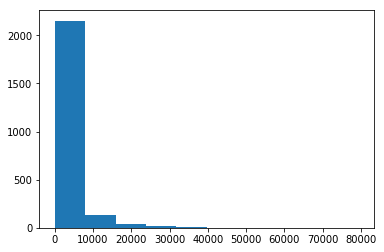

In [25]:
tweet_df.retweet_count.hist(grid = False)

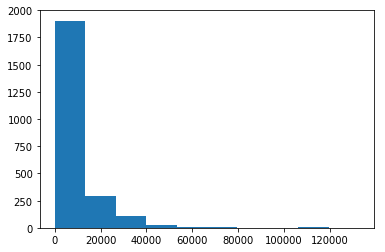

In [26]:
tweet_df.favorite_count.hist(grid = False)

### Image_prediction

In [27]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
image_prediction[image_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [30]:
image_prediction[image_prediction.jpg_url.duplicated()].shape[0]

66

In [31]:
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

**Assessment Findings**:

**archivedf:**

- there are 181 retweets (out of scope for this project)
- there are 78 replies (out of scope for this project)
- rating_numerators are not uniform/consistant they range from 0 to 1776. Maximum is 10 but people rate more
- rating_denominator of 0 will cause the rate to be infinity
- some names are missing, entered as "none" and some of them are entered as "a" , "an" , "the"
- doggo, floofer, pupper, and puppo have "None" values
- dog stage as a tidness issue as there should be a single column having these values doggo, floofer, pupper, or puppo
- there should be seprate columns for day, month and year
- Erronous data types:
    - tweet_id is an int
    - timestamp is a str
    - in_reply_to_status_id is float
    - in_reply_to_user_id is float
    - retweeted_status_id is float
    - retweeted_status_user_id is float
    - retweeted_status_timestamp is str
- url has null values

**tweet_df:**
- tweet_id is an int

**image_prediction**
- 66 jpg_url are duplicates
- there are multiple columns for image prediction and their confidence interval


<a id='cleaningdata'></a>
## Cleaning Data

In [32]:
# Creating copy of data

archivedf_original = archivedf.copy()
tweetdf_original= tweet_df.copy()
image_prediction_original = image_prediction.copy()

**Quality:**

1. Change data types of the following in archivedf:
    - tweet_id to string 
    - timestamp to datetime format
    *We would not change data type for other columns identified above as they are going to be deleted eventually*
2. Change data type of tweet_id to string in tweet_df
3. Change data type of tweet_id to string in image_prediction
4. Cap numerator to 15 for the purpose of analysis as it goes upto 1700
5. Cap favorite counts to 20000 and remove the outliers in tweet_df
6. Cap retweet counts to 60000 and remove the outliers in tweet_df
7. Drop retweets and replies as they are out of scope for the purpose of analysis
8. Drop the following columns:
    - in_reply_to_user_id
    - in_reply_to_status_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
    - rating_denominator
    - expanded_urls
9. Find out weekday for the purpose of analysis
10. Drop 66 jpg_url duplicated in image_prediction
11. Merge predictions columns and the confidence interval columns into one in image_prediction table
12. Delete p1,p1_conf, p1_dog, p2, p2_conf,	p2_dog,	p3,	p3_conf, p3_dog columns

**Tidiness:**

11. Make separate columns for the following:
    - Day
    - Month
    - Year
    - Hour
    - Minute We will ignore secounds
12. All dog stages doggo, floofer, pupper, puppo should be in a single column

<a id='quality'></a>
### Quality

**Define**

1. Change data types of the following in archivedf:
    - tweet_id to string
    - timestamp to datetime format

  *We would not change data type for other columns identified above as they are going to be deleted eventually*

2. Change data type of tweet_id to string in tweet_df

3. Change data type of tweet_id to string in image_prediction


**1.,2.,3. Code:**

In [33]:
# code 1
archivedf.tweet_id = archivedf.tweet_id.astype(str)


archivedf.timestamp = pd.to_datetime(archivedf.timestamp)

In [34]:
# code 2
tweet_df.tweet_id = tweet_df.tweet_id.astype(str)

In [35]:
image_prediction.tweet_id = image_prediction.tweet_id.astype(str)

**1.,2.,3. Test:**

In [36]:
archivedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [37]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [38]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Define:**

4. Cap numerator to 15 for the purpose of analysis as it goes upto 1700

5. Cap favorite counts to 20000 and remove the outliers

6. Cap favorite counts to 60000 and remove the outliers

**4.,5.,6. Code:**

In [39]:
num = archivedf[archivedf.rating_numerator > 15].index.tolist()
len(num)

numretweet = tweet_df[tweet_df.retweet_count > 20000].index.tolist()

numfav = tweet_df[tweet_df.favorite_count > 60000].index.tolist()

In [40]:
meanofnum = round(archivedf["rating_numerator"][archivedf.rating_numerator < 15].mean(), 0)
meanofnum = int(meanofnum)

meanofretweet = tweet_df[tweet_df.retweet_count < 20000].retweet_count.mean()
meanofretweet = int(meanofretweet)

meanoffav = tweet_df[tweet_df.favorite_count < 60000].favorite_count.mean()
meanoffav = int(meanoffav)

for i in num:
    archivedf.at[i, "rating_numerator"] = meanofnum
    
for i in numretweet:
    tweet_df.at[i, "retweet_count"] = meanofretweet
    
for i in numfav:
    tweet_df.at[i, "favorite_count"] = meanoffav
        

**4.,5.,6. Test**:

In [41]:

archivedf[archivedf.rating_numerator > 15]


tweet_df[tweet_df.retweet_count > 20000]

tweet_df[tweet_df.favorite_count > 60000]

,tweet_id,retweet_count,favorite_count


**7. Define:**

Drop retweets, replies and null expanded_urls

**7. Code:**

In [42]:
archivedf.drop(index = archivedf[archivedf.retweeted_status_id.notnull()].index, inplace= True)
archivedf.drop(index = archivedf[archivedf.in_reply_to_status_id.notnull()].index, inplace= True)
archivedf.drop(index = archivedf[archivedf.expanded_urls.isnull()].index, inplace = True)

**7. Test:**

In [43]:
2356 - 259- 3 == archivedf.shape[0]

True

**8. Define:**

Drop the following columns:
    - in_reply_to_user_id
    - in_reply_to_status_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
    - rating_denominator
    - expanded_urls

In [44]:
archivedf.shape[1]

17

**8. Code:**

In [45]:
archivedf.drop(columns = ["in_reply_to_status_id", "in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","expanded_urls","retweeted_status_timestamp","rating_denominator"], axis = 1,inplace = True)

**8. Test:**

In [46]:
archivedf.shape[1] == 17-7

True

**9. Define:**

Finding out weekday for the purpose of analysis

**9. Code:**

In [47]:
# Finding the day of the week from the date

archivedf["weekday"] = archivedf.timestamp.dt.weekday

# Data dictionary
weekday_dict = {0:"Monday", 1: "Tuesday", 2:"Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6 : "Sunday"}

#Getting weekday from no. of day in the week
archivedf["weekday"] = archivedf["weekday"].map(weekday_dict)


**9. Type:**

In [48]:
archivedf.head()

,tweet_id,timestamp,source,text,rating_numerator,name,doggo,floofer,pupper,puppo,weekday
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,None,None,None,Tuesday
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,None,None,None,None,Tuesday
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,None,None,None,Monday
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,None,None,None,None,Sunday
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,None,None,None,None,Saturday


In [49]:
archivedf.head(2)

,tweet_id,timestamp,source,text,rating_numerator,name,doggo,floofer,pupper,puppo,weekday
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,None,None,None,Tuesday
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,None,None,None,None,Tuesday


**10. Define:**

Drop 66 duplicate jpg_url

**10. Code:**

In [50]:
image_prediction.drop_duplicates("jpg_url", inplace= True)

**10. Test:**

In [51]:
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**11. Define:**

Merge predictions columns and the confidence interval columns into one in image_prediction table

**11. Code:**

In [52]:
dog_breed = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction):
    if image_prediction['p1_dog'] == True:
        dog_breed.append(image_prediction['p1'])
        confidence_list.append(image_prediction['p1_conf'])
    elif image_prediction['p2_dog'] == True:
        dog_breed.append(image_prediction['p2'])
        confidence_list.append(image_prediction['p2_conf'])
    elif image_prediction['p3_dog'] == True:
        dog_breed.append(image_prediction['p3'])
        confidence_list.append(image_prediction['p3_conf'])
    else:
        dog_breed.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction.apply(image, axis = 1)

#create new columns
image_prediction['dog_breed'] = dog_breed
image_prediction['confidence_list'] = confidence_list

**11. Test:**

In [53]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id           2009 non-null object
jpg_url            2009 non-null object
img_num            2009 non-null int64
p1                 2009 non-null object
p1_conf            2009 non-null float64
p1_dog             2009 non-null bool
p2                 2009 non-null object
p2_conf            2009 non-null float64
p2_dog             2009 non-null bool
p3                 2009 non-null object
p3_conf            2009 non-null float64
p3_dog             2009 non-null bool
dog_breed          2009 non-null object
confidence_list    2009 non-null object
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 194.2+ KB


In [54]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


**12. Define:**

Delete p1,p1_conf, p1_dog, p2, p2_conf,	p2_dog,	p3,	p3_conf, p3_dog columns

**12. Code:**

In [55]:
image_prediction.drop(columns = ['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace = True)

**12. Test:**

In [56]:
image_prediction.shape[1] == 14 - 9

True

<a id='tidiness'></a>
### Tidiness

**13. Define:**

Make separate columns for the following:
- Day
- Month
- Year
- Hour
- Minute
*We will ignore secounds*

**13. Code:**

In [57]:
archivedf['timestamp_day'] = archivedf.timestamp.dt.day
archivedf['timestamp_month'] = archivedf.timestamp.dt.month
archivedf['timestamp_year'] = archivedf.timestamp.dt.year
archivedf['timestamp_hour'] = archivedf.timestamp.dt.hour
archivedf['timestamp_min'] = archivedf.timestamp.dt.minute
archivedf.drop(columns = 'timestamp', inplace = True)

**13. Test:**

In [58]:
archivedf.head(2)

,tweet_id,source,text,rating_numerator,name,doggo,floofer,pupper,puppo,weekday,timestamp_day,timestamp_month,timestamp_year,timestamp_hour,timestamp_min
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,None,None,None,Tuesday,1,8,2017,16,23
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,None,None,None,None,Tuesday,1,8,2017,0,17


In [59]:
archivedf.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'weekday', 'timestamp_day',
       'timestamp_month', 'timestamp_year', 'timestamp_hour', 'timestamp_min'],
      dtype='object')

**14. Define:**

All dog stages doggo, floofer, pupper, puppo should be in a single column

**14. Code:**

In [60]:
archivedf = archivedf.melt(id_vars =['tweet_id', 'source','text', 'rating_numerator','name',
                                     'timestamp_day', 'timestamp_month', 'timestamp_year', 'timestamp_hour',
                                        'timestamp_min', 'weekday'], value_vars = ["doggo", "floofer", "pupper", "puppo"], 
                                        value_name = 'dog_stage' )
archivedf.drop(columns = 'variable', inplace = True )

In [61]:
dog_stage_df = archivedf[archivedf.dog_stage != "None"][["tweet_id", "dog_stage"]] 
dog_stage_df.dog_stage.value_counts()

pupper     229
doggo       83
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [62]:
archivedf.drop_duplicates('tweet_id', inplace = True )
archivedf = pd.merge(archivedf, dog_stage_df, how = "left", on = "tweet_id")
archivedf.drop(columns="dog_stage_x", inplace = True)
archivedf.rename(columns={"dog_stage_y":"dog_stage"}, inplace = True)

**14. Test:**

In [63]:
archivedf.dog_stage.value_counts()

pupper     229
doggo       83
puppo       24
floofer     10
Name: dog_stage, dtype: int64

**Joining two datasets:**

In [64]:
df_temp = pd.merge(archivedf, tweet_df, how = "inner", on = "tweet_id")

In [65]:
df = pd.merge(df_temp, image_prediction, how = "inner", on = "tweet_id")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 18 columns):
tweet_id            1981 non-null object
source              1981 non-null object
text                1981 non-null object
rating_numerator    1981 non-null int64
name                1981 non-null object
timestamp_day       1981 non-null int64
timestamp_month     1981 non-null int64
timestamp_year      1981 non-null int64
timestamp_hour      1981 non-null int64
timestamp_min       1981 non-null int64
weekday             1981 non-null object
dog_stage           313 non-null object
retweet_count       1981 non-null int64
favorite_count      1981 non-null int64
jpg_url             1981 non-null object
img_num             1981 non-null int64
dog_breed           1981 non-null object
confidence_list     1981 non-null object
dtypes: int64(9), object(9)
memory usage: 294.1+ KB


<a id='storinganalyzingandvisualizing'></a>
## Storing, Analyzing and Visualizing

In [67]:
archivedf.to_csv('twitter_archive.csv', index = None)

In [68]:
tweet_df.to_csv('twitter_download.csv', index = None)

In [69]:
image_prediction.to_csv('image_prediction.csv', index = None)

In [70]:
df.to_csv('twitter_archive_master.csv', index = None)

<a id='one'></a>

### 1. Distribution of the ratings

Text(0.5,1,'Rating distribution')

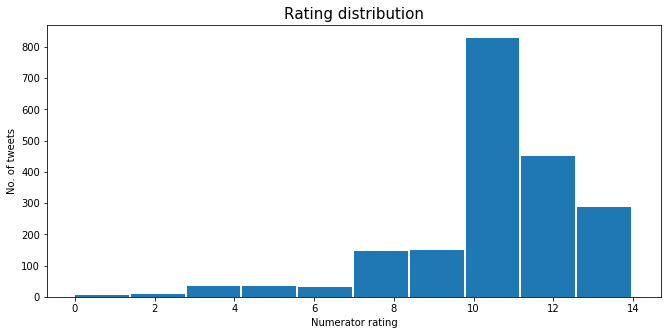

In [71]:
plt.figure(figsize= (11,5))
df.rating_numerator.hist(grid = False, width = 1.35)
plt.xlabel("Numerator rating")
plt.ylabel("No. of tweets")
plt.title("Rating distribution", fontsize = 15)

**Observation 1: The ratings are negatively skewed. One of the key reasons is that we have capped the ratings at 15 as there were lot of outliers. Although the ratings are out of 10, there are hardly any posts where the ratings are lesser than 10. Pet owners love their dog so much that they rate their dogs 10 or higher.**

<a id='two'></a>

### 2. Relationship between different variables

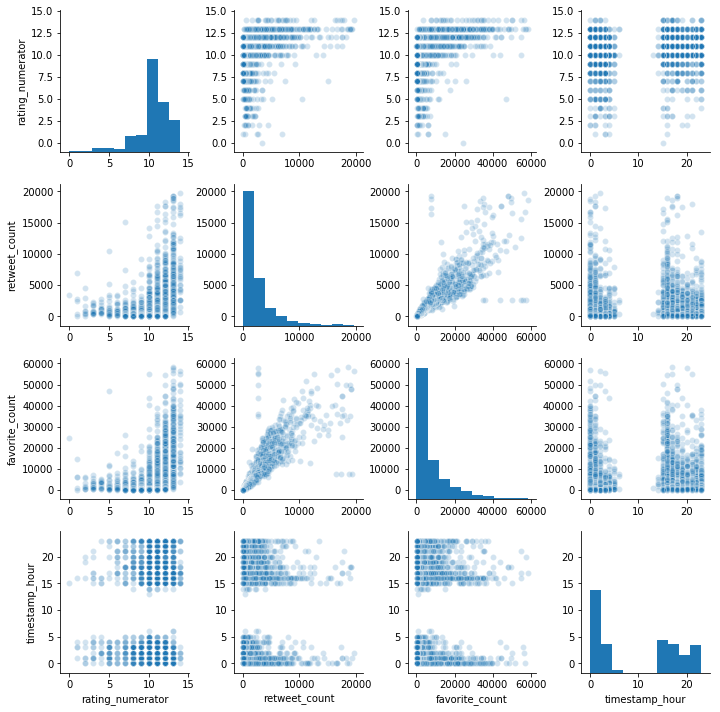

In [72]:
sns.pairplot(df, 
             vars = ['rating_numerator', 'retweet_count', 'favorite_count', 'timestamp_hour'], 
             diag_kind = 'hist', plot_kws = {'alpha': 0.2});

**Observation 2: Favorite counts and retweet counts are positively correlated.**

**Favorite counts and ratings are also positively correlated.**

**Retweet counts and ratings are positively correlated.**

**Favorite count it rightly skewed distribution as likes can't be negative.**

**Retweet count is also rightly skewed distribution as retweets
can't be negative.**

**Hardly any activity is seen during peak office hours. The ratings, favorite counts and retweet counts are higher post lunch.**

<a id='three'></a>

### 3. Retweet count Vs. favorite count

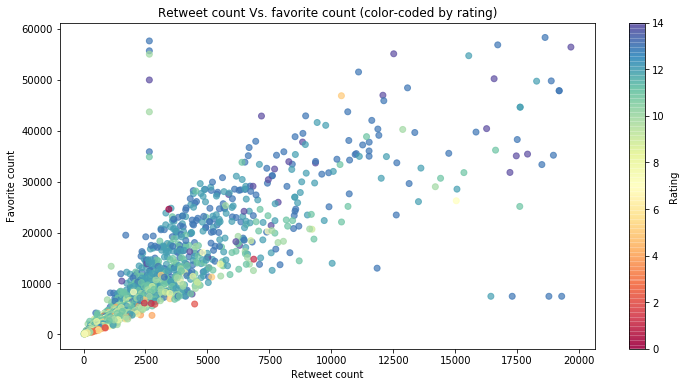

In [73]:
colours = df['rating_numerator']
plt.figure(figsize = (12, 6))
plt.scatter(df['retweet_count'], df['favorite_count'], c = colours, alpha = 0.7, cmap ='Spectral')

# title and labels
plt.title('Retweet count Vs. favorite count (color-coded by rating)')

plt.xlabel('Retweet count')
plt.ylabel('Favorite count')

cbar = plt.colorbar()
cbar.set_label('Rating')

**Observation 3: The retweet count and favorite count are positively correlated. The correlation between them seems to be strong. It seems that the tweet with higher rating is re-tweeted or marked as favorite more.**

<a id='four'></a>

### 4. Favorite count and retweet count by hour of the day

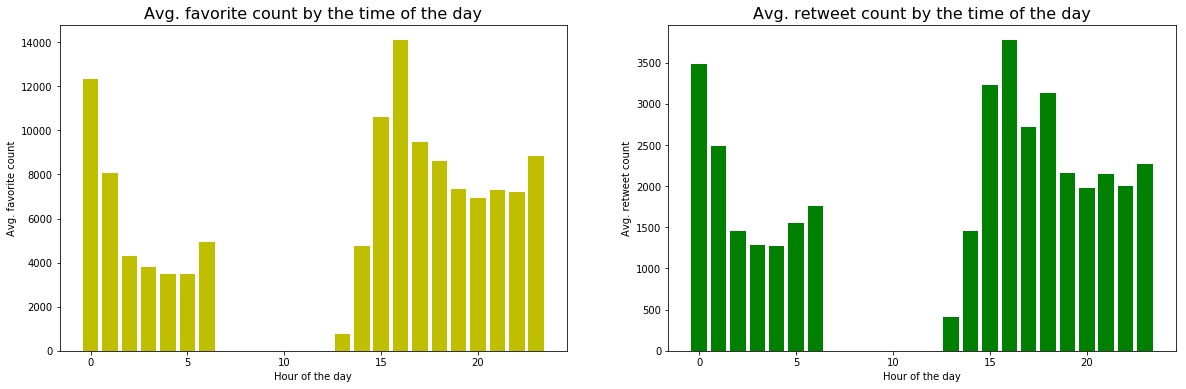

In [74]:
hour_df = df.groupby('timestamp_hour').mean()[['favorite_count', 'retweet_count']].reset_index()

plt.figure(figsize = [20, 6])

plt.subplot(1, 2, 1)
plt.bar(hour_df['timestamp_hour'], hour_df['favorite_count'], color = 'y')
plt.xlabel('Hour of the day')
plt.ylabel('Avg. favorite count')
plt.title("Avg. favorite count by the time of the day", fontsize = 16);


plt.subplot(1, 2, 2)
plt.bar(hour_df['timestamp_hour'], hour_df['retweet_count'], color = 'g')
plt.xlabel('Hour of the day')
plt.ylabel('Avg. retweet count')
plt.title("Avg. retweet count by the time of the day", fontsize = 16);



**Observation 4: Most of the tweets happen before 7 am or starting 1 pm. There are no tweets between 7 am and 1 pm. These are peak office hours office hours.The favorite count of the tweet posted at 1 PM is higher than the tweets posted at 6 AM. It might be the time of the day where the boredom sets in and people would be posting and viewing more stuff than usual.**

**The retweet count of the tweet posted at 6 AM and 1 PM is almost similar.**

<a id='five'></a>

### 5. Favorite count and retweet count by day of the week.

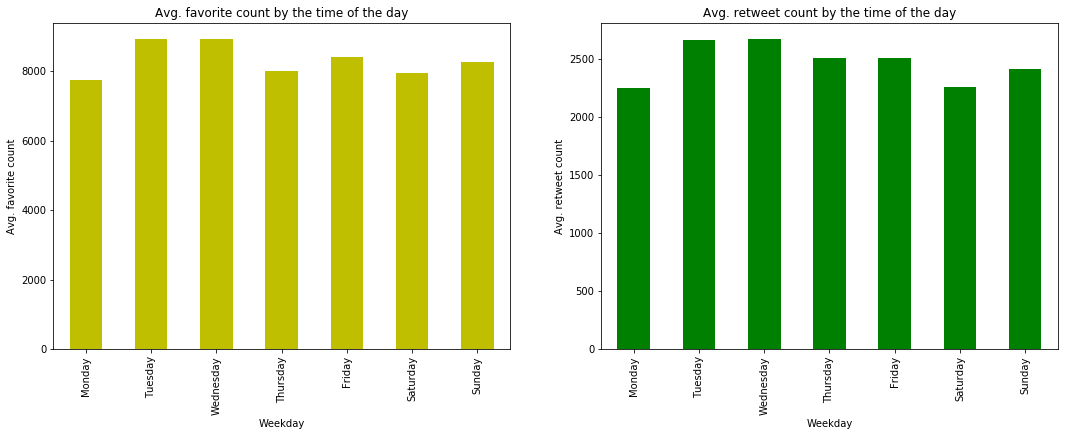

In [75]:
df["weekday"] = df.weekday.astype("category")
output = pd.Categorical(values = df.weekday, categories = ["Monday" ,"Tuesday","Wednesday", "Thursday","Friday", "Saturday", "Sunday"], ordered = True)
output
weekday_df = df.groupby('weekday').mean()[['favorite_count', 'retweet_count']].reset_index()
weekday_df['weekday']= weekday_df['weekday'].astype(output)
weekday_df = weekday_df.sort_values('weekday').reset_index()


figure, axes = plt.subplots(1, 2)
# Plot 1
weekday_df.plot(x = 'weekday',y = 'favorite_count', kind='bar', color = 'y', legend = False, figsize= (18,6), ax=axes[0], title = "Avg. favorite count by the time of the day")
#plt.xticks(rotation = 0)
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Avg. favorite count');

#Plot 2
weekday_df.plot(x = 'weekday',y = 'retweet_count', kind='bar',color = 'green',legend= False, figsize= (18,6), ax=axes[1], title ="Avg. retweet count by the time of the day" )
#plt.xticks(rotation = 0)
plt.xlabel('Weekday')
plt.ylabel('Avg. retweet count');


**Observation 5: Average favorite and retweet counts are highest on Tuesdays and Wednesdays.**

<a id='six'></a>

### 5. Top 10 favorite breeds of dog.

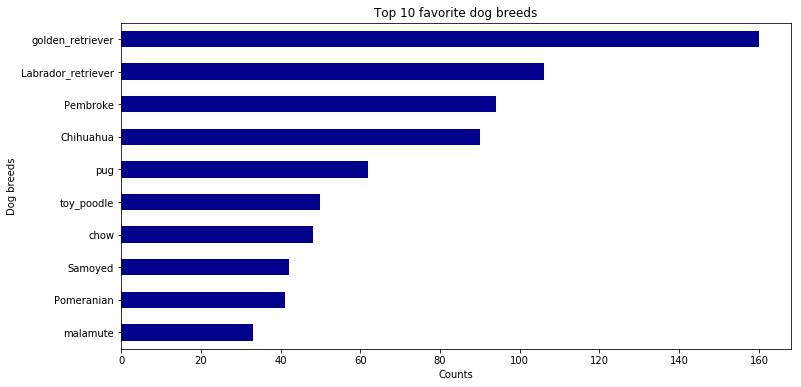

In [76]:
dogbreed_df  =  df.dog_breed.value_counts().sort_values(ascending = False)[1:11]

ax = dogbreed_df.plot(x = dogbreed_df.index ,y = dogbreed_df, kind='barh', legend = False, color ='darkblue', figsize= (12,6), title = "Top 10 favorite dog breeds")
ax.invert_yaxis()
plt.xlabel('Counts')
plt.ylabel('Dog breeds');

**Observation 6: Golden retriever, Labrador retriever and Pembroke are top 3 favorite dog breeds.**

<a id='conclusion'></a>
## Conclusion

1. The ratings are negatively skewed. One of the key reasons is that we have capped the ratings at 15 as there were lot of outliers. Although the ratings are out of 10, there are hardly any posts where the ratings are lesser than 10. Pet owners love their dog so much that they rate their dogs 10 or higher.

2. Favorite counts and retweet counts are positively correlated.
    - Favorite counts and ratings are also positively correlated.
    - Retweet counts and ratings are positively correlated.
    - Favorite count it rightly skewed distribution as likes can't be negative.
    - Retweet count is also rightly skewed distribution as retweets can't be negative.
    - Hardly any activity is seen during peak office hours. The ratings, favorite counts and retweet counts are higher post lunch.

3. The retweet count and favorite count are positively correlated. The correlation between them seems to be strong. It seems that the tweet with higher rating is re-tweeted or marked as favorite more.

4. Most of the tweets happen before 7 am or starting 1 pm. There are no tweets between 7 am and 1 pm. These are peak office hours office hours.The favorite count of the tweet posted at 1 PM is higher than the tweets posted at 6 AM. It might be the time of the day where the boredom sets in and people would be posting and viewing more stuff than usual.
    - The retweet count of the tweet posted at 6 AM and 1 PM is almost similar.
    
5. Average favorite and retweet counts are highest on Tuesdays and Wednesdays.
6. Golden retriever, Labrador retriever and Pembroke are top 3 favorite dog breeds.


<a id='references'></a>
## References
- https://github.com/latinacode/Wrangle-and-Analyze-Data
- https://github.com/latinacode/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

In [77]:
from platform import python_version

print(python_version())

3.6.3
